## Graph performance metrics Part 2: Clustering Coefficients

## MTH 325, Fall 2016 

## Overview

This is the second of three miniprojects exploring the __performance metrics__ of graphs that model social networks. The previous lesson focused on the _diameter_ of a graph, which measures how "close-knit" or "dense" a network is. In this miniproject we explore the concept of __clustering coefficients__. 

## The idea of clustering coefficients

To motivate the idea of clustering coefficients, let's think about the people in some of your own social networks. In your networks, you will have some people who are the "social butterflies" of the network: Those people are in your network and tend to have others "clustered" around them who are also friends. At the same time, there are often people in your network who are your friends, but may not be friends with many other people. 

For example, look at this social network: 

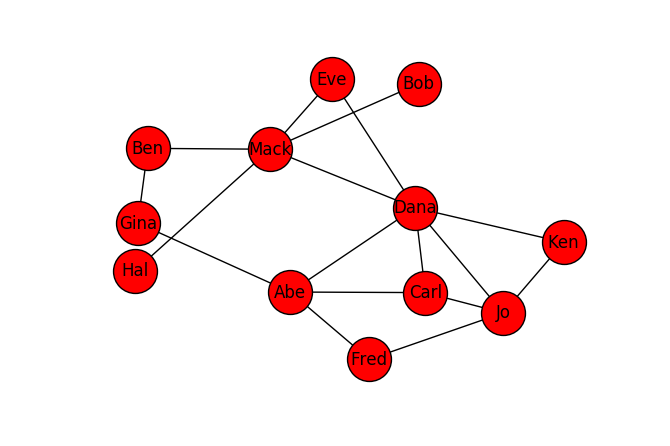

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

network = nx.Graph({'Ben': ['Gina', 'Mack'],
 'Jo': ['Carl', 'Dana', 'Ken', 'Fred'],
 'Abe': ['Carl', 'Dana', 'Gina', 'Fred'],
 'Carl': ['Jo', 'Abe', 'Dana'],
 'Dana': ['Jo', 'Abe', 'Carl', 'Eve', 'Ken', 'Mack'],
 'Eve': ['Dana', 'Mack'],
 'Gina': ['Ben', 'Abe'],
 'Hal': ['Mack'],
 'Ken': ['Jo', 'Dana'],
 'Mack': ['Ben', 'Dana', 'Eve', 'Hal', 'Bob'],
 'Fred': ['Jo', 'Abe'],
 'Bob': ['Mack']})

nx.draw(network, with_labels = True, node_size=1000)
plt.show()

In this network, Dana and Carl have a special kind of role. They are connected to a lot of friends, and _those friends_ are connected to _each other_. It's like Carl and Dana are at the center of a [clique](http://www.merriam-webster.com/dictionary/clique) -- a small, close-knit group of friends who share connections not only with a common person but also to each other. 

Mack, on the other hand, is similarly connected to lots of friends -- but there's a difference: The friends that Mack is connected to, are not generally connected to each other. Mack is friends with Eve, Bob, Hal, Ben, and Dana; but of those people, only Dana and Eve know *each other*. Mack is actually connected to more people than Carl is; but Carl's friends are more connected _to each other_ than Mack's friends are. 

The phenomenon that is happening with Carl and Dana, but which is not happening with Mack, is known in graph theory as __clustering__. We would say that Carl and Dana have "more clustering" than Mack does. Jo, too, has a high degree of clustering -- she is connected to four people and there is a lot of interconnections between her friends. In fact we might say that Jo and Carl have "the same amount of clustering". A node with a high level of clustering is connected to a high number of nodes *that are themselves connected*, like a person in a social group who acts as the social director -- they know people and all those people are friends of each other. A node with a low level of clustering may be connected to a lot of nodes but none of those are *interconnected*. This would be like a person who interacts with people who aren't around each other much -- like perhaps a manager in a company where people work remotely and never communicate with each other. 

What we would like here is a way to *quantify* the amount of clustering that a node in a graph has, and perhaps a way to quantify the "average amount of clustering" across all the nodes in a graph. Let's start with a couple of extreme cases. That's the focus of this definition: 

>__Definition:__ Let $G$ be a graph and $v$ a node in the graph. Then the __clustering coefficient__ of $v$, denoted $CC(v)$, is given by the following formula: 
$$CC(v) = \left\{
\begin{array}{cl}
0 & \text{if} \ \deg(v) = 0 \ \text{or} \ \deg(v) = 1 \\
\dfrac{2 N_v}{K_v (K_v - 1)} & \text{if} \ \deg(v) \geq 2
\end{array}
\right.$$
where $K_v = \deg(v)$ and $N_v$ is the number of edges between the _neighbors_ of $v$. 


So a node of degree 0 or 1 automatically has a clustering coefficient of 0; and for all other nodes, we use a formula. Let's break the formula down to understand its component parts and its output. 

Here is an example of graph in which a very small amount of clustering takes place: 

<img src="stargraph.png" height=300 width=300>

Looking at node $v$, it is connected to several other nodes but there are _no_ connections between its neighbors. Then we can see that $K_v = \deg(v) = 6$ and $N_v$ -- the number of edges between the neighbors of $v$ -- is 0. Therefore in the formula, there would be a 0 in the numerator and so $CC(v) = 0$. This kind of graph is known as a _star graph_ for visual reasons. 

Now consider $K_6$, the complete graph on 6 nodes and pick any node you want within the graph and call it $v$. Then $K_v = \deg(v) = 5$, and the $N_v$ (again, the number of connections between the neighbors of $v$) is $C(5,2) = (5 \times 4)/2 = 10$. So the clustering coefficient of that node is 
$$CC(v) = \frac{2 N_v}{K_v (K_v - 1)} = \frac{2 \times 10}{5 \times 4} = 1$$
The complete graph is the epitome of a clique, a small group that is highly interconnected. 

The star graph and $K_n$ are at opposite ends of a spectrum in terms of clustering. A star is as minimally clustered as possible; the complete graph is as highly clustered as possible. Therefore note that $CC(v)$ is a _fraction_ that can range from 0 to 1. A clustering coefficient of 0 indicates that the node is at the center of a star network; a clustering coefficient of 1 indicates the node resides within a clique. A clustering coefficient in between those extremes measures the "clique-ishness" of the node, that is, how interconnected its friends are. 

Back to the network above, let's compute some clustering coefficients. 

Start with Carl. His degree is 3. His neighbors are Jo, Dana, and Abe; there are two edges between those neighbors ({Jo, Dana} and {Dana, Abe}). Therefore for $v = \text{Carl}$, $K_v = 3$ and $N_v = 2$. So Carl's clustering coefficient is 
$$CC(v) = \frac{2 N_v}{K_v (K_v - 1)} = \frac{2 \cdot 2}{3 \cdot 2} = \frac{2}{3}$$
Now look at Dana. His degree is 6. His neighbors are Abe, Carl, Jo, Ken, Eve and Mack; the number of edges between those neighbors is 4. So, 
$$CC(v) = \frac{2 N_v}{K_v (K_v - 1)} = \frac{2 \cdot 4}{6 \cdot 5} = \frac{4}{15}$$
This is actually a lot less than Carl's clustering coefficient. Again, Dana is connected to _more people_, but those people are _less interconnected_ than the people to whom Carl is connected. 

Finally look at Mack. Mack's immediate neighbors _almost_ form a star, so we would expect his clustering coefficient to be close to 0. Let's check: His degree is 5; the number of edges between his neighbors is 1. Therefore his clustering coefficient is 
$$CC(v) = \frac{2 N_v}{K_v (K_v - 1)} = \frac{2 \cdot 1}{5 \cdot 4} = \frac{1}{10}$$

The idea above of clustering coefficient is for _individual nodes_. But we can also define a _global_ idea of clustering that describes the tendency of an entire graph to have clustering: 

>__Definition:__ Let $G$ be a graph. Then the __clustering coefficient of the graph__ is denoted $CC(G)$ and is the average of the clustering coefficients of all the nodes in the graph. This is sometimes called the **overall clustering coefficient of $G$** to distinguish it from the clustering coefficient of a single node. 

As an exercise to make sure you understand the idea of clustering coefficients, find the clustering coefficients of the remaining 9 nodes in the graph. (Some can be done in your head.) Then take the average of these to find the clustering coefficient of the entire graph; you should find it comes out to $53/180$ for the network above. 

## Finding clustering coefficients using Python + networkX

If $G$ is defined as a graph object in networkX, there is a single method that finds both the clustering coefficient of a node and the overall clustering coefficient of an entire graph: `.clustering`. Here is some code that shows how it works. 

First, let's look at a new graph: 

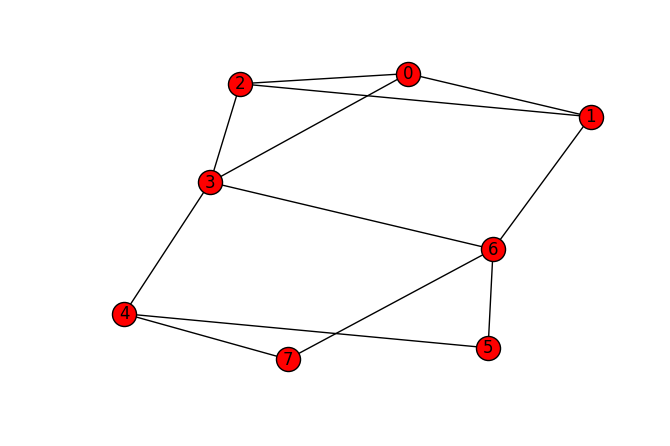

In [30]:
example_graph = nx.Graph({0: [1,2,3], 1: [0,2,6], 2: [0,1,3], 3: [0,2,4,6], 
                          4: [3,5,7], 5: [5,6], 6: [1,3,5,7], 7: [4,6]})

nx.draw(example_graph, with_labels = True)
plt.show()

In [31]:
# Find the clustering coefficients of node 3, then node 7. 
# The arguments of the method are the graph name, then the node. 

nx.clustering(example_graph, 3)

0.16666666666666666

In [32]:
nx.clustering(example_graph, 7)

0.0

This checks out, because with node 3, its degree is $K_v =4$; and $N_v = 1$ because the neighbors of node 3 are 0, 2, 4, and 6 and there is an edge between 0 and 2, but that's it. Therefore $CC(3) = \frac{2 \cdot 1}{4 \cdot 3} = \frac{1}{6}$. Likewise with node 7, its degree is $K_v = 2$, but $N_v = 0$ because there are no edges between any of its neighbors. Therefore $CC(7) = 0$. (The clustering coefficient is automatically zero if none of the neighbors of the node are connected to each other.) 

If you want the overall clustering coefficient of the graph, leave off the argument with the node: 

In [33]:
nx.clustering(example_graph)

{0: 0.6666666666666666,
 1: 0.3333333333333333,
 2: 0.6666666666666666,
 3: 0.16666666666666666,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0}

As you can see, what this gives you is a dictionary with the nodes as keys and the individual clustering coefficients as the values. It's basically a table that lists all the clustering coefficients throughout all the nodes. To get the overall clustering coefficient for `example_graph` we need to find the statistical average of all seven of the individual clustering coefficients:

In [38]:
d = nx.clustering(example_graph)             # <-- Rename the dictionary above
total = sum([d[i] for i in range(len(d))])   # <-- Put each value into a list and then sum the list up
print(total/len(d))                          # <-- Print the average

0.22916666666666666


Can you write some code that will take in a dictionary of this form and return the average of the values?

Finally, here's a short video that elaborates on these topics and gives further examples: 

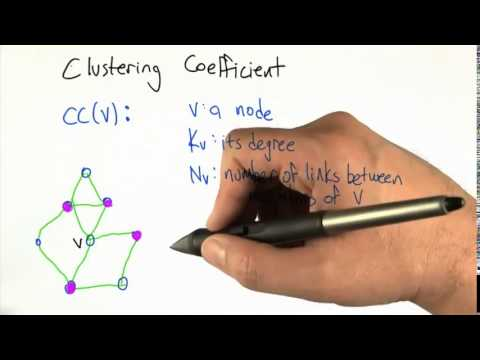

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo("K2WF4pT5pFY")